# **Welcome to the Notebook**

### Let's mount the google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 45.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=391d6ce8114ac46072a1fe6e9a214c37f35108111538579a7254da42444ee930
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


Importing the modules 

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [4]:
spark = SparkSession.builder.appName('Mik_spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [5]:
listening_csv_path = '/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)


let's check the data:  (header True to remove c0, c1, etc and instead have user_id, date, etc)

In [6]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [7]:
listening_df = listening_df.drop('date')

drop the null rows:

In [8]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [9]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [10]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [11]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(7448028, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [12]:
q0 = listening_df.select('artist','track')

q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [13]:
q1 = listening_df.select('*').filter(listening_df.artist=='Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

(select top 10 users where fan of Rihanna)

In [14]:
q2 = listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()


+---------------+-----+
|        user_id|count|
+---------------+-----+
|    eyessetkyle|  166|
|           adxx|  164|
|helloiamnatalie|  128|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|       AndyKitt|  115|
|          jzshy|  111|
|      djbXathia|  105|
|    Aims_rose18|  103|
| duttywhineross|  101|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [15]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 1986|
|          Zayn|       PILLOWTALK| 1647|
|Arctic Monkeys| Do I Wanna Know?| 1624|
|      Bon Iver|      Skinny Love| 1613|
|      Bastille|          Pompeii| 1533|
|       Rihanna|             Work| 1510|
|Mumford & Sons|  Little Lion Man| 1492|
| Justin Bieber|    Love Yourself| 1489|
| Justin Bieber|What Do You Mean?| 1472|
| Fleetwood Mac|  Go Your Own Way| 1459|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [16]:
q4 = listening_df.select('artist','track').filter(listening_df.artist == 'Rihanna').groupBy('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 1510|
|Rihanna|Only Girl (In the...| 1048|
|Rihanna|We Found Love (fe...|  912|
|Rihanna|            Rude Boy|  799|
|Rihanna|                 S&M|  753|
|Rihanna|            Diamonds|  699|
|Rihanna| Where Have You Been|  484|
|Rihanna|      Kiss it Better|  441|
|Rihanna|Cheers (Drink to ...|  405|
|Rihanna|           Disturbia|  395|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [17]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo| 8320|
|               alt-J|     An Awesome Wave| 8002|
|              The xx|                  xx| 7839|
|      Arctic Monkeys|Whatever People S...| 7815|
|      Arctic Monkeys|                  AM| 7709|
|      Mumford & Sons|        Sigh No More| 7665|
|               Adele|                  21| 6776|
|            Bon Iver|            For Emma| 6701|
|Florence + the Ma...|               Lungs| 6378|
|              Grimes|          Art Angels| 6334|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [18]:
genre_csv_path = '/content/drive/MyDrive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(genre_csv_path)
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



let's check the data

In [19]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

Let's inner join these two data frames

In [20]:
data = listening_df.join(genre_df, how = 'inner',on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [21]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+--------------+-----+
|       user_id|count|
+--------------+-----+
|       01Green|  496|
|       Jiransu|  244|
|    BIGBANG186|  227|
| forgetaboutit|  211|
|    gleeKfreaK|  200|
|   aboylike_me|  200|
|     ethancruz|  200|
|  edge_ofglory|  200|
|JohnandEdwardd|  200|
|   kiekiekoala|  200|
+--------------+-----+



**Query #7**

find top 10 famous genres

In [22]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|1454170|
|       pop| 861938|
|electronic| 292333|
|   hip hop| 289445|
|indie rock| 238384|
|      folk| 237490|
|      punk| 200050|
|       r&b| 198988|
|     indie| 112643|
|      jazz| 110912|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [23]:
q8_1 = data.select('user_id','genre').groupby('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+------------+--------------------+-----+
|     user_id|               genre|count|
+------------+--------------------+-----+
|--ladyluck--|             Rajwant|    1|
|--ladyluck--|            Big Sean|    4|
|--ladyluck--|                rock|    1|
|--ladyluck--|              Common|    2|
|--ladyluck--|           Rick Ross|    2|
|--ladyluck--|             dubstep|    3|
|--ladyluck--| R Kelly & Teyana...|    2|
|--ladyluck--|               house|   15|
|--ladyluck--|             minimal|   11|
|--ladyluck--|                soul|   18|
|--ladyluck--|               disco|    3|
|--ladyluck--|                  AZ|   16|
|--ladyluck--|          deep house|    2|
|--ladyluck--|               Q-Tip|   16|
|--ladyluck--|   Theophilus London|    2|
|--ladyluck--|               Jay-Z|    4|
|--ladyluck--|    Kathryn Williams|    1|
|--ladyluck--|          Thom Yorke|    1|
|--ladyluck--|         Mark Taylor|    1|
|--ladyluck--|          microhouse|    1|
+------------+--------------------

In [24]:
q8_2 = q8_1.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max'))
q8_2.show()

+---------------+-----------------+
|        user_id|              max|
+---------------+-----------------+
|     -Amnesiac-|     {150, metal}|
|         -Bish-|       {59, rock}|
|        -Danni-|       {45, rock}|
|          -DeWp|    {82, hip hop}|
|      -Faction-|       {56, rock}|
|-February-Star-|       {74, rock}|
|        -Gemma-|{38, british pop}|
|   -Gingergirl-|        {28, pop}|
|        -Hazel-|   {14, synthpop}|
|        -Heiko-| {43, electronic}|
|         -Katie|      {58, lo-fi}|
|      -Krystal-|       {87, rock}|
|  -allniceonice|       {29, jazz}|
|      -bubbles-|       {52, folk}|
|       -chloayy|       {74, rock}|
|       -citric-|     {32, techno}|
|   -girlafraid-|       {54, rock}|
|-invinoveritas-|     {81, comedy}|
|           -jc-|  {62, post rock}|
|         -laura|        {57, rap}|
+---------------+-----------------+
only showing top 20 rows



In [25]:
q8_3 = q8_1.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q8_3.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|  -allniceonice|       jazz|
|      -bubbles-|       folk|
|       -chloayy|       rock|
|       -citric-|     techno|
|   -girlafraid-|       rock|
|-invinoveritas-|     comedy|
|           -jc-|  post rock|
|         -laura|        rap|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [32]:
q9 = genre_df.select("genre").filter(  (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')  ).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [33]:
q9.collect()

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

In [41]:
q9_list = q9.collect()

In [43]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

now lets visualize these two lists using a bar chart

In [44]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


<BarContainer object of 4 artists>

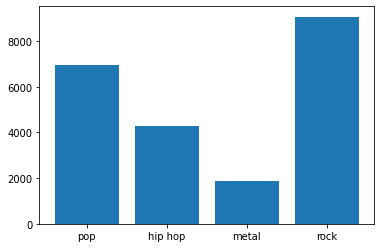

In [45]:
plts.bar(labels,counts)